# Lista 2

Disciplina: ELE08624 - Tópicos Especiais em Processamento de Imagens

Semestre: 2020/1 - especial

Aluno: Gabriel Carvalho Benedito

Matrícula: 2013100874

## Imports

In [1]:
# imports
import cmath
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import image, colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import PercentFormatter
import numpy as np
import PIL
from scipy.fft import fft2, fftshift, ifft2

## Funções personalizadas

In [25]:
# NOTE: all custom function assumes normalized images on range [0, 1]

def plot_img_gray(img, title=None):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray', vmin=0, vmax=1)
    ax.set_title(title)
    ax.axis('off')

# plots an grayscale image
def plot_img(img, title=None):
    fig, ax = plt.subplots()
    ax.imshow(img, vmin=0, vmax=1)
    ax.set_title(title)
    ax.axis('off')

# plots input and output images
# TODO
def plot_img_in_out(img_in, img_out):
    fig, axs = plt.subplots(1, 2)
    # input image
    axs[0].imshow(img_in, cmap='gray', vmin=0, vmax=1)
    axs[0].set_title('Entrada')
    axs[0].axis('off')
    # output image
    axs[1].imshow(img_out, cmap='gray', vmin=0, vmax=1)
    axs[1].set_title('Saída')
    axs[1].axis('off')

# plots input and output images
# TODO
def plot_spectrum(img):
    fig, axs = plt.subplots(1, 3)
    # input image
    axs[0].imshow(img, cmap='gray', vmin=0, vmax=1)
    axs[0].set_title('Entrada')
    axs[0].axis('off')
    # fft2
    img_fft2_abs, img_fft2_angle = fft2_polar(img)
    # abs
    axs[1].imshow(img_fft2_abs, cmap='gray', norm=LogNorm())
    axs[1].set_title('Módulo')
    axs[1].axis('off')
    # angle
    axs[2].imshow(img_fft2_angle, cmap='gray', vmin=-np.pi, vmax=np.pi)
    axs[2].set_title('Fase')
    axs[2].axis('off')

# plots an frequency and density histogram
# TODO
def plot_hist(img, n_bins=30):
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Histograma')
    plt.subplots_adjust(wspace=0.39)
    # vetorize image (transform to 1D-vector)
    vect_img = np.reshape(img, (-1))
    # stats
    img_mean = np.mean(vect_img)
    img_median = np.median(vect_img)
    mean_label = 'Média = {:.2f}'.format(img_mean)
    median_label = 'Mediana = {:.2f}'.format(img_median)
    # frequencies
    axs[0].hist(vect_img, bins=n_bins)
    axs[0].axvline(img_mean, c='g', label=mean_label)
    axs[0].axvline(img_median, c='r', label=median_label)
    axs[0].legend(fontsize='xx-small')
    axs[0].set_xlim(0, 1)
    axs[0].set_ylabel('Número de pixels')
    axs[0].set_xlabel('Intensidade [0, 1]')
    # density
    weights = np.ones_like(vect_img) / vect_img.size
    axs[1].hist(vect_img, bins=n_bins, weights=weights)
    axs[1].axvline(img_mean, c='g', label=mean_label)
    axs[1].axvline(img_median, c='r', label=median_label)
    axs[1].legend(fontsize='xx-small')
    axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
    axs[1].set_xlim(0, 1)
    axs[1].set_ylabel('Densidade')
    axs[1].set_xlabel('Intensidade [0, 1]')

# according to exercice 4 specification
# TODO
def spatial_conv(a, kernel_func, kernel_size=1, padding=False, mode='constant', **kwargs):
    # neighborhood range of kernel along each axis, considering a central pixel and without conting it
    kernel_offset = int((kernel_size - 1) / 2)
    # compute input
    if not padding:
        # just copy
        a_in = np.copy(a)
    else:
        # pad width
        pad_width = kernel_offset
        # apply padding given numpy possibilities
        a_in = np.pad(a, pad_width, mode, **kwargs)
    # initialize output
    b_out_shape = (a_in.shape[0] - kernel_size + 1, a_in.shape[1] - kernel_size + 1)
    b_out = np.empty(b_out_shape, dtype=a_in.dtype)
    # iterate over rows and coluns
    for r_out, r_in in enumerate(range(kernel_offset, a_in.shape[0] - kernel_offset)):
        for c_out, c_in in enumerate(range(kernel_offset, a_in.shape[1] - kernel_offset)):
            # kernel as neighborhood of input
            kernel = a_in[r_in-kernel_offset:r_in+kernel_offset+1, c_in-kernel_offset:c_in+kernel_offset+1]
            # apply kernel function
            b_out[r_out, c_out] = kernel_func(kernel)
    return b_out

# element-wise polar-rect complex transform
# TODO
def rect(x_abs, x_angle):
    x = np.empty_like(x_abs).astype(complex)
    for r in range(x_abs.shape[0]):
        for c in range(x_abs.shape[1]):
            x[r, c] = cmath.rect(x_abs[r, c], x_angle[r, c])
    return x

# polar components of dft of x (applies fftshift before returning)
# TODO
def fft2_polar(x):
    x_fft2 = fftshift(fft2(x))
    return np.abs(x_fft2), np.angle(x_fft2)

# inverse dft of x from polar components (applies fftshift before computing)
# TODO
def real_ifft2_polar(x_abs, x_angle):
    return np.real(ifft2(fftshift(rect(x_abs, x_angle))))

## Exercício 1

Faça uma rotina que converta RGB-HSI e outra de HSI-RGB. Depois, usando essas transformadas, substitua, automaticamente, a cor das laranjas para verde na imagem [oranges.jpg](img/oranges.jpg). Discuta a sua solução.

### Imagem de entrada

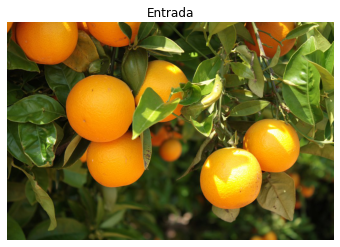

In [13]:
# open image
img = image.imread('img/oranges.jpg')

# transforms
# normalization
img = img / 255

# plot
plot_img(img, 'Entrada')

## Exercício 2

Faça uma rotina que deixa a cor dos pimentões vermelhos da figura [peppers.tiff](img/peppers.tiff) sem alteração e que deixe os demais elementos da imagem em nível de cinza. Use a equação de percepção humana de luminosidade para obter o nível de cinza: I = 0.21 R + 0.72 G + 0.07 B. Comente a solução usada e o resultado.

### Imagem de entrada

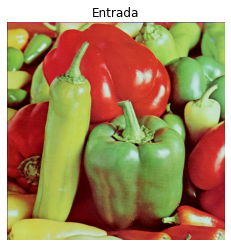

In [15]:
# open image
img = image.imread('img/peppers.tiff')

# transforms
# normalization
img = img / 255

# plot
plot_img(img, 'Entrada')

## Exercício 3

Para a imagem [imsemcontraste.jpg](img/imsemcontraste.jpg), melhore seu contraste. Explique sua solução.

### Imagens de entrada

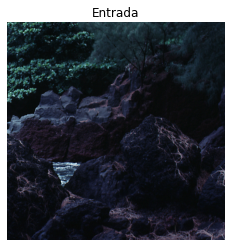

In [20]:
# open image
img = image.imread('img/imsemcontraste.jpg')

# transforms
# normalization
img = img / 255

# plot
plot_img(img, 'Entrada')

## Exercício 4

Usando a transformada de Hough, encontre as linhas brancas nos limites da estrada na imagem [estrada.png](img/estrada.png). Discuta a solução encontrada.

### Imagem de entrada

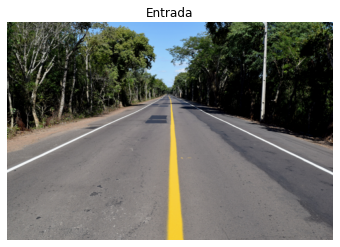

In [22]:
# open image
img = image.imread('img/estrada.png')

# plot
plot_img(img, 'Entrada')

## Exercício 5

Tente reproduzir o exemplo 10.22 do livro (3ª edição) na imagem [Fig1049(a).tif](img/Fig1049(a).tif) comparando o método de Otsu com o método de médias móveis. Comente.

### Imagem de entrada

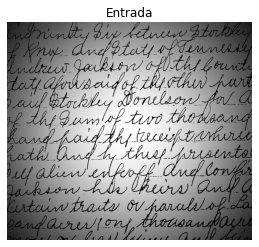

In [26]:
# open image
img = image.imread('img/Fig1049(a).tif')

# transforms
# normalization
img = img / 255

# plot
plot_img_gray(img, 'Entrada')

## Perguntas

### 1) Qual a diferença entre uma imagem com cor falsa e outra com cor verdadeira? Por que em algumas imagens é usada cor falsa?

TODO

### 2) Explique o método de Canny.

TODO

### 3) Explique o procedimento de divisão e fusão de região(Seção 10.4.2).

TODO